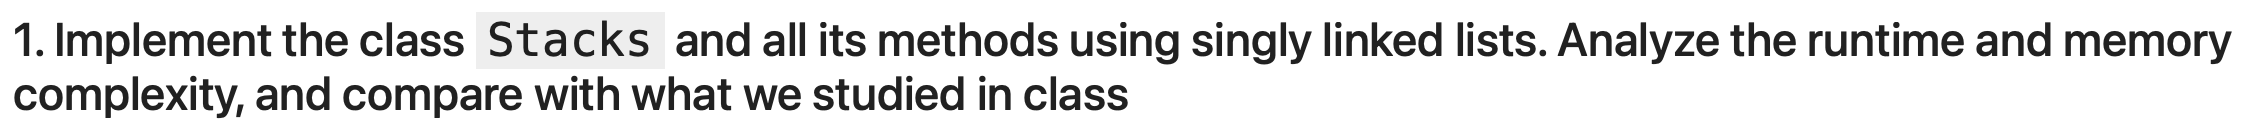

In [64]:
import ctypes
from time import time

# Time wrapping function that will allow us to check the execution time of different functions
def temporizador(func):
    def wrap_function(*args, **kwargs):
        time1 = time()*10**6
        result = func(*args, **kwargs)
        time2 = time()*10**6
        return result, time2 - time1
    return wrap_function

# **************************************************   
# ************ START OF Original STACK *************
# **************************************************

class Stack(object):
    """
    Implementation of the stack data structure
    """

    def __init__(self, n):
        self.l = 0
        self.n = n
        self.stack = self._create_stack(self.n)        
    
    def _create_stack(self, n):
        """
        Creates a new stack of capacity n
        """
        return (n * ctypes.py_object)()

    
    @temporizador    
    def push(self, item):
        """
        Add new item to the stack
        """
        if self.l == self.n:
            raise ValueError("no more capacity")
        self.stack[self.l] = item
        self.l += 1
        
    @temporizador    
    def pop(self):
        """
        Remove an element from the stack
        """
        # self.l = 0
        # 0 is equivalent to False
        # any number != 0 is True
        if not self.l:
            raise('stack is empty')
        c = self.stack[self.l-1]
        #self.stack[self.l] = ctypes.py_object
        self.l -= 1
        return c
    
    @temporizador    
    def top(self):
        """
        Show the top element of the stack
        """
        return self.stack[self.l-1]
    
    @temporizador    
    def full(self):
        """
        Is the stack full?
        """
        return self.l == self.n
        # if self.l == self.n:
        #    return True
        # return False

    @temporizador    
    def empty(self):
        """
        Is the stack empty?
        """
        return self.l == 0
        #if self.l == 0:
        #    return True
        #return False

    @temporizador    
    def size(self):
        """
        Return size of the stack
        """
        return self.l

# **************************************************   
# ******* START OF MODIFIED STACK (HOMEWORK) *******
# **************************************************

class Node:
    def __init__(self, val = None):
        self.val = val
        self.next_node = None
        
    def set_next_node(self, next_node):
        self.next_node = next_node

class Stack_Modified(object):

    # A head_node is necessary for applying the linked list
    def __init__(self, n, head_node = None):
        self.l = 0
        self.n = n
        self.head_node = Node(head_node)


    @temporizador    
    def push(self, next_node_val):
        
        # A new_node is created that stores the value that is recieved by the function
        new_node = Node(next_node_val)
        
        if self.l == self.n:
            raise ValueError("no more capacity")
        # If the Stack is empty, then the recieved node becomes the head_node
        elif self.l == 0:
            self.head_node = new_node
        # If the Stack is not empty, then the new_node has to be included at the end of the singly linked list 
        else:
            prev = self.head_node
            node = prev.next_node
            
            # While loop breaks once the end of the linked list is reached
            while node:
                prev = node
                node = prev.next_node
            
            # Prev is the last node that stores a value, so its next node becomes the previously created new_node
            prev.next_node = new_node
        
        # The Stack size is increased 
        self.l += 1
        
    @temporizador    
    def pop(self):

        if not self.l:
            raise('stack is empty')
            
        # In case there is only one element on the Stack
        if self.l == 1:
            # The value of the head_node is stored in case that the head node is the only node in the list ...
            # ... this way, the node can be deleted, the new head_node becomes a Null pointer, and the value ...
            # ... can be returned
            valor = self.head_node.val 
            self.head_node = None
            
            # The Stack size is decreased
            self.l -= 1
            return valor
        
        else:
            # If are more elements on the Stack, then the last should be removed
            prev = self.head_node    
            node = prev.next_node
                        
            while node:
                # Prev2 is needed in order to delete the last node, as'node' becomes a null at the end of the while loop...
                # ... and prev is the last node that has to be deleted. Prev2 is the node that comes before the pointer ...
                # that has to be deleted
                prev2 = prev
                prev = node
                node = prev.next_node
                #print(prev.val)
            
            # Prev2 allows us to delete the last node from the Stack
            prev2.next_node = None
            # The Stack size is decreased
            self.l -= 1
            return prev.val

    
    @temporizador    
    def top(self):
        
        # To see the last elemen of the Stack, then the same process for the pop() is used ...
        # ... with the difference that no node is deleted
        
        if not self.l:
            raise('stack is empty')
        else: 
            prev = self.head_node
            node = prev.next_node
            
            while node:
                prev = node
                node = prev.next_node
            
            return prev.val
        
    # The rest of the functions are kept the same 
    
    @temporizador    
    def full(self):

        return self.l == self.n


    @temporizador    
    def empty(self):

        return self.l == 0


    @temporizador        
    def size(self):

        return self.l

In [65]:
S = Stack_Modified(10)

print('Se ingresó un número al Stack (push())\nTamaño:', end = ' ')
S.push(7)
print(S.size())
print('Se ingresó segundo número al Stack (push())\nTamaño:', end = ' ')
S.push(10)
print(S.size())
print('Se realiza un \'pop\':', end = ' ')
print(S.pop())
print('Nuevo tamaño: ', S.size())

Se ingresó un número al Stack (push())
Tamaño: (1, 2.0)
Se ingresó segundo número al Stack (push())
Tamaño: (2, 2.0)
Se realiza un 'pop': (10, 5.0)
Nuevo tamaño:  (1, 1.0)


In [66]:
# Lists are created to store the execution time of each loop, and the elements stored on each iteration
tiempo_SM = []
tiempo_S = []
capacidades_SM = []

# Maximum capacity for the Stacks is established
capacidad = 10_001

# Value that will control how many elements are stored in the Stacks
k = 1

while k <= 10_000:
    # Both the Stack and the modified Stack are created with the capacity inside the loop for fresh start on every iteration
    SM = Stack_Modified(capacidad)
    S = Stack(capacidad)
    # The stablished number of elements are stored in the Stacks
    for i in range(k + 1):
        SM.push(i)
        S.push(i)
        
    # The time for each 'pop' function is stored in the lists
    tiempo_SM.append(SM.pop()[1])
    tiempo_S.append(S.pop()[1])
    
    # The number of elements on each iteration is stored in list
    capacidades_SM.append(S.size()[0])
    
    # Growth allow us to check the execution times for 1, 10, 100, 1_000 and 10_000 elements
    k = k*10

# Number of elements are shown
print('\nNumber of elements on every iteration: ', capacidades_SM)

# Times are shown for pop() on each Stack
print('Tiempos SM: ', tiempo_SM)
print('Tiempos S: ', tiempo_S)



Number of elements on every iteration:  [1, 10, 100, 1000, 10000]
Tiempos SM:  [2.75, 3.0, 10.0, 72.0, 1088.25]
Tiempos S:  [3.0, 1.25, 1.0, 1.75, 5.75]


#### Datos obtenidos en Desmos: 

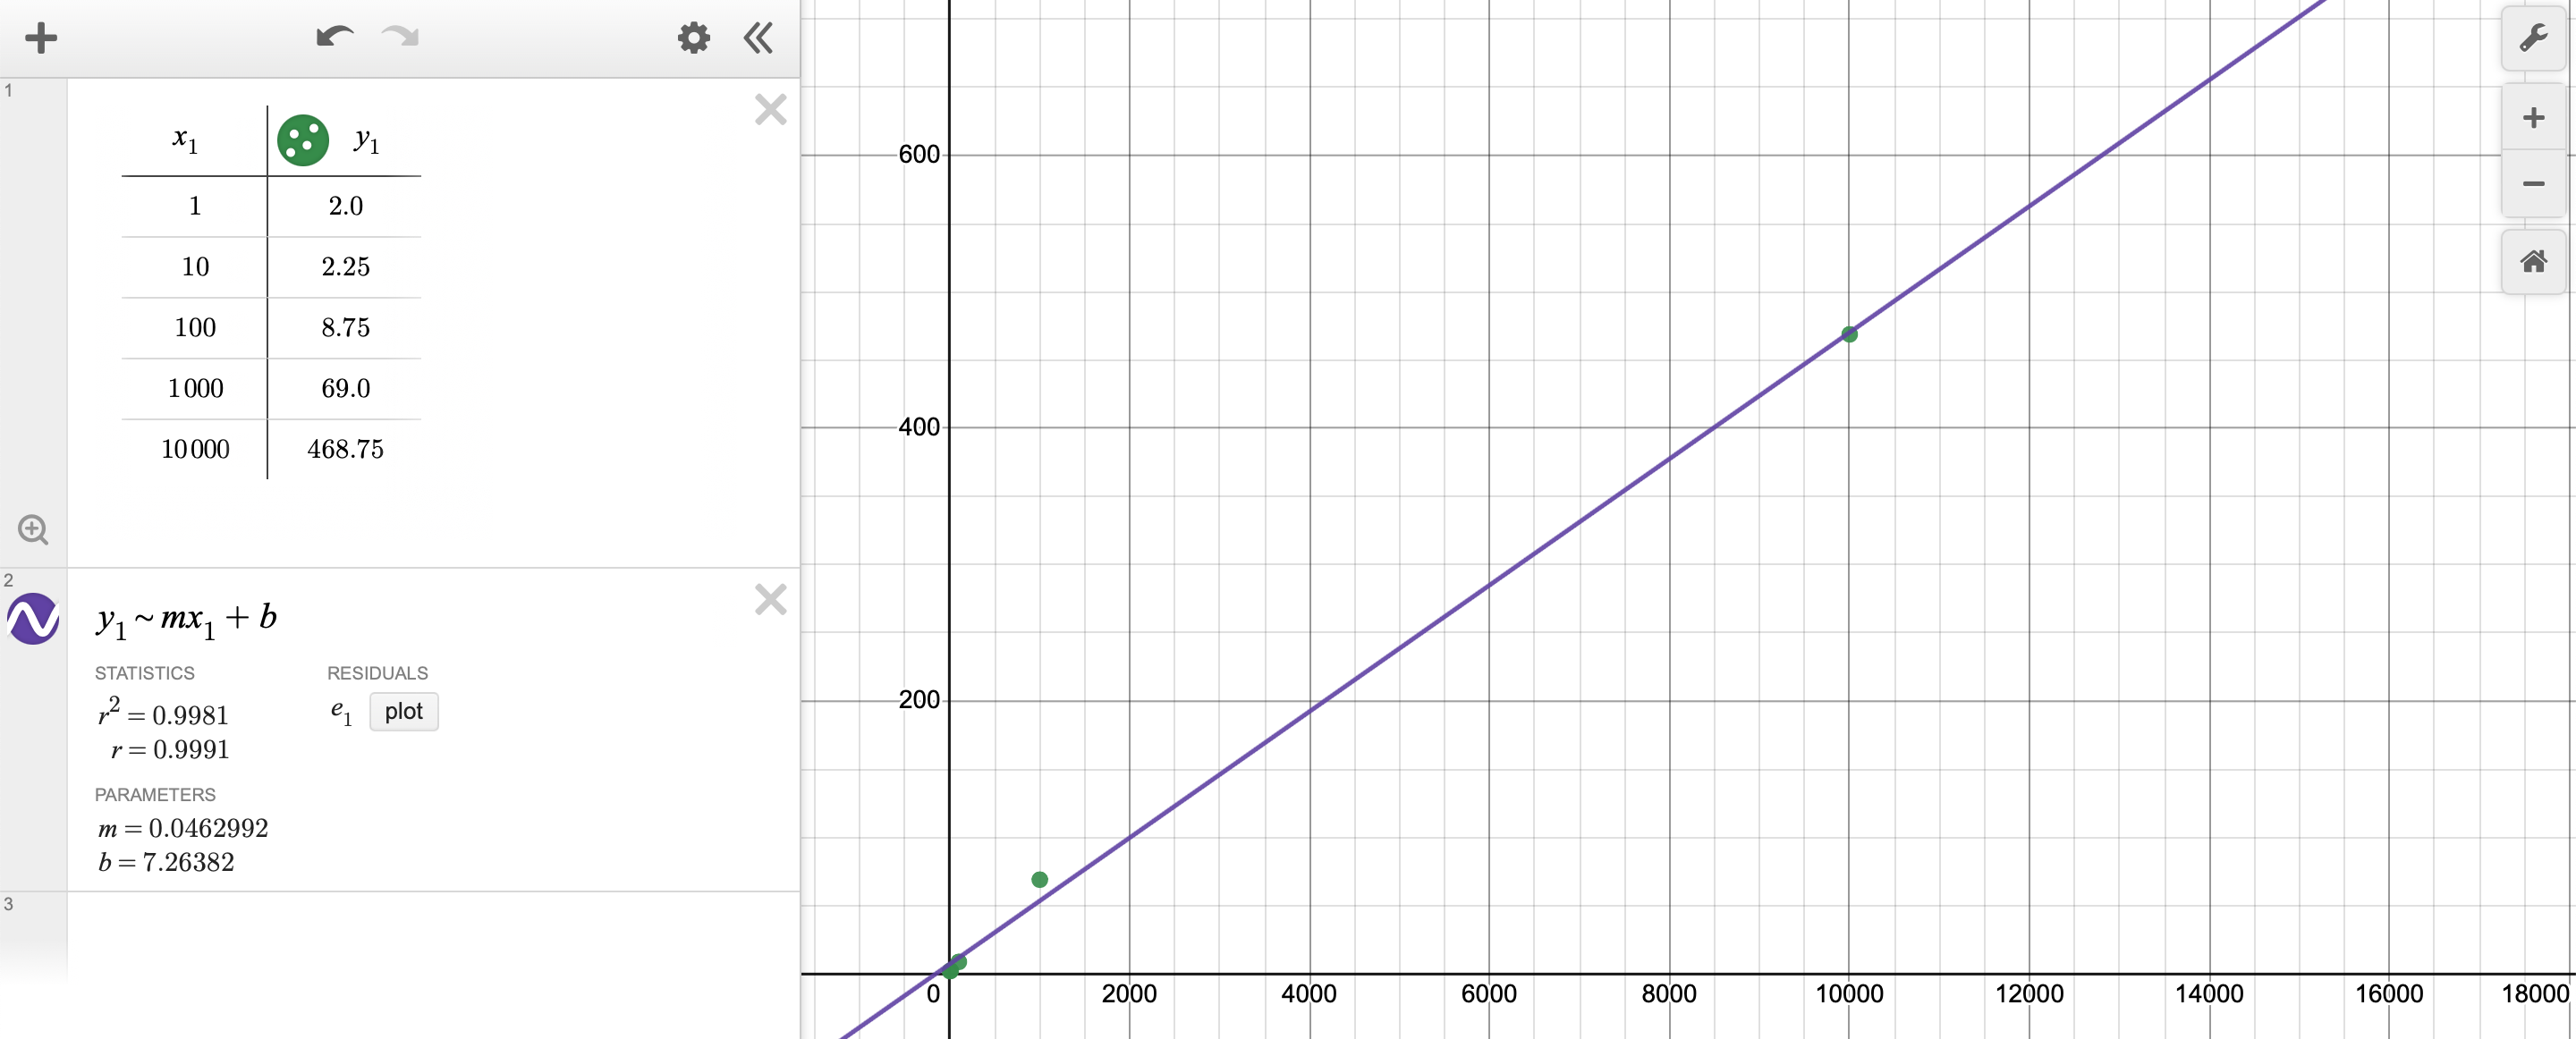

#### Se observa que la función pop() para el Stack modificado (con lista enlazada) tiene una complejidad lineal

###### * No se grafica el tiempo que toma a la función pop() en el Stack normal debido a que tiene una complejidad de tiempo constante. Esto tiene sentido, pues sabemos que los Stacks siguen el orden LIFO, por lo que le va a tomar un tiempo constante retirar su último elemento. 

## Análisis de Memoria:

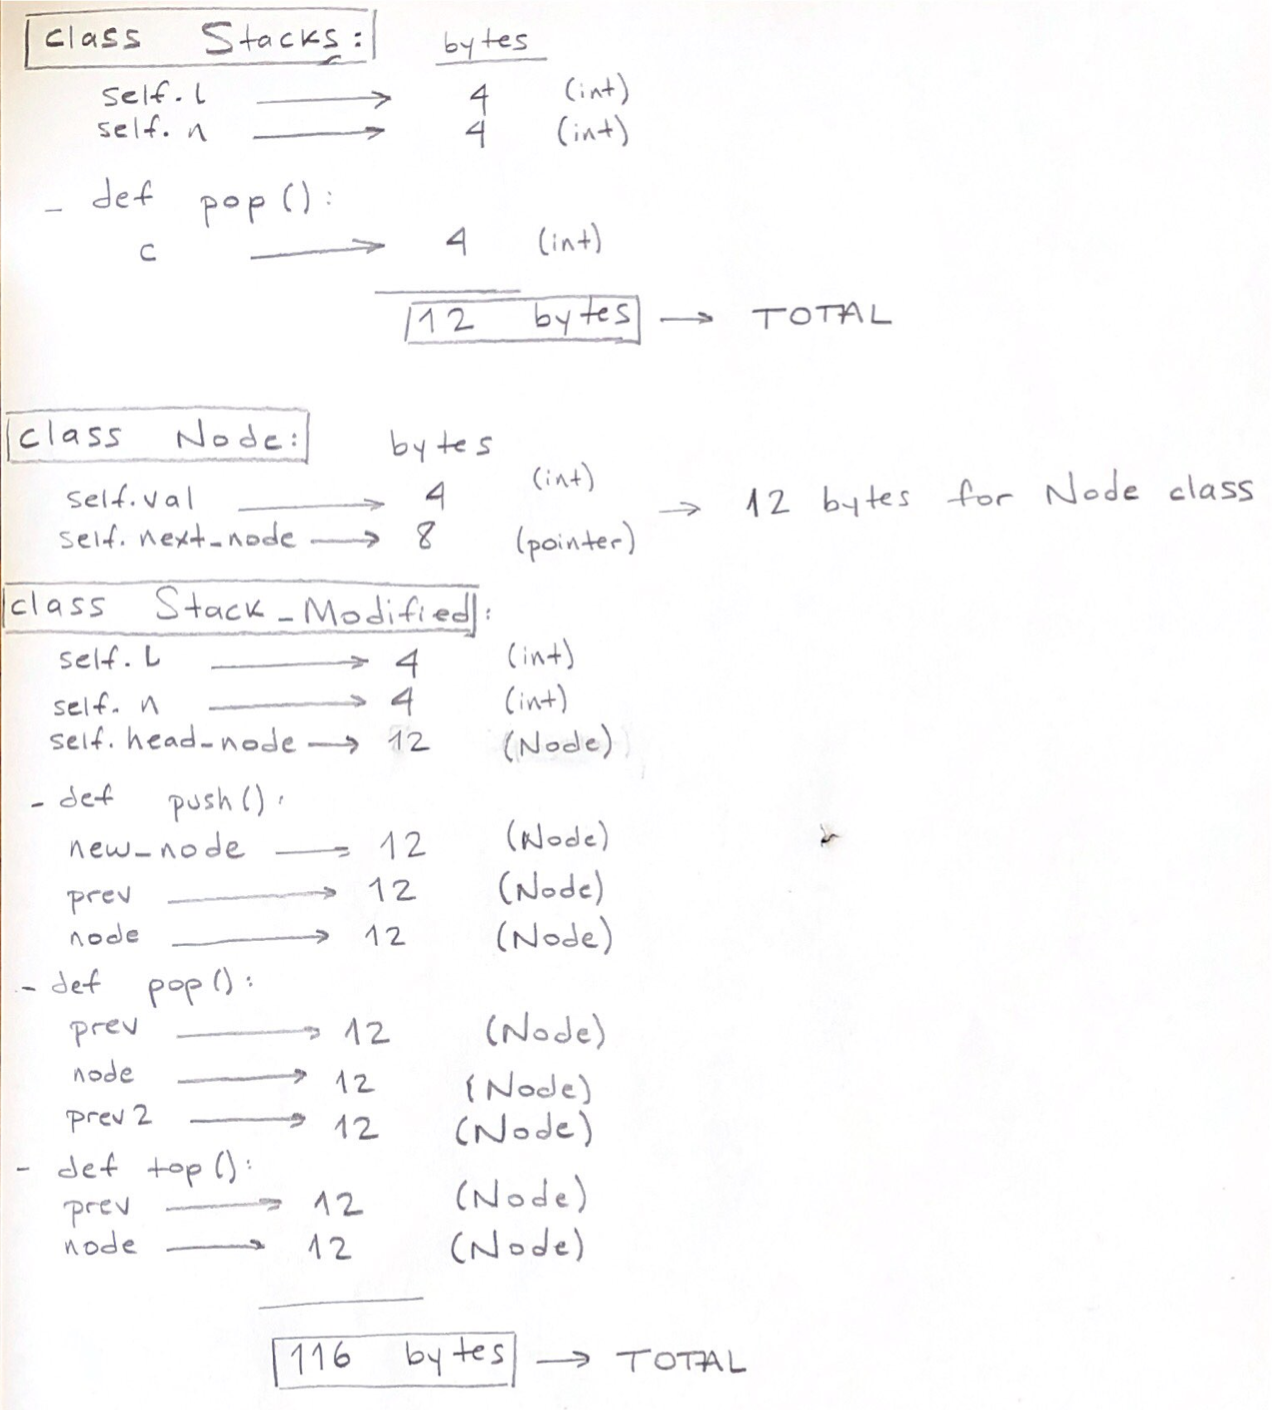

Se observa que la complejidad de memoria es sumamente superior para la clase Stack_Modified.

- Stack: 12 bytes

- Stack Modified: 116 bytes

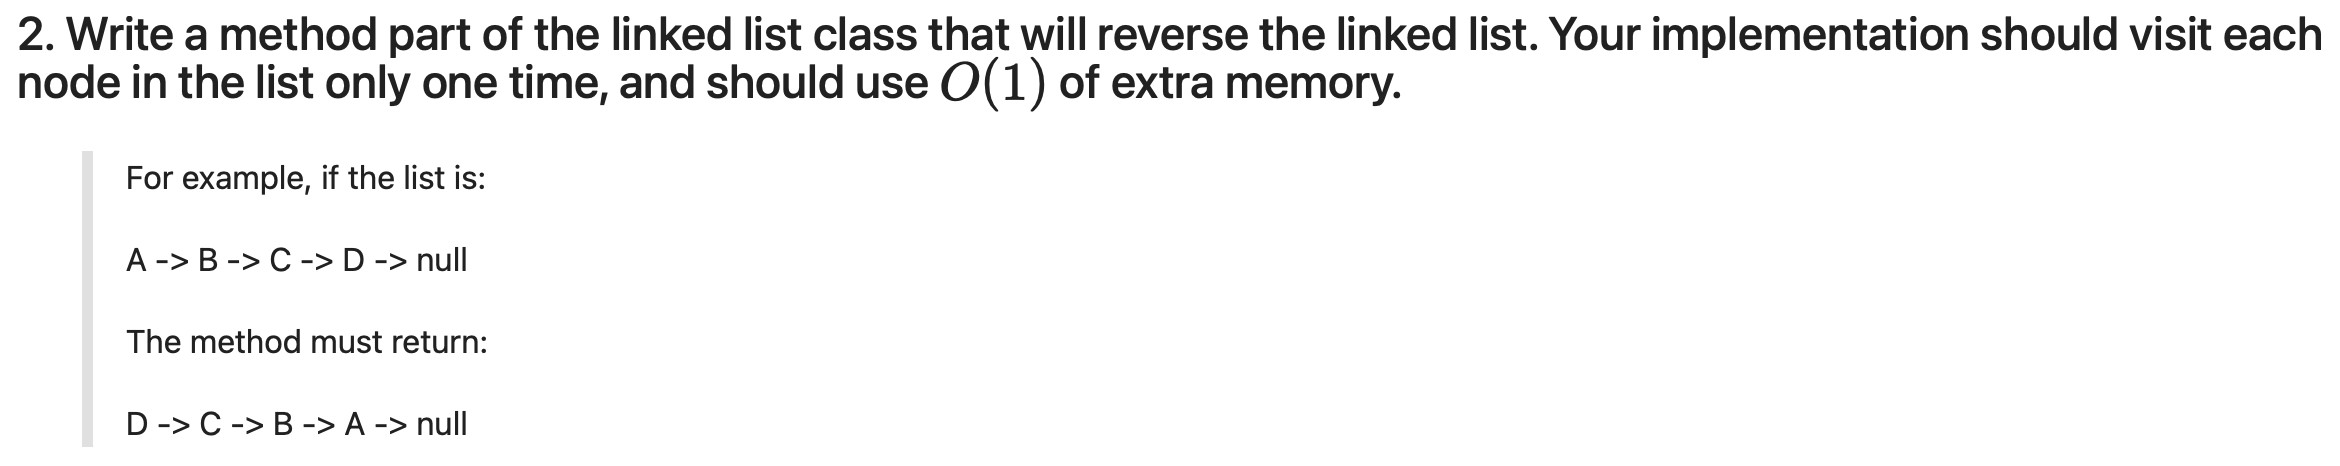

In [67]:
# Code taken from A

class Singly_linked_list:
    
    def __init__(self, head_node = None):
        self.head_node = head_node
        
    def list_traversed(self):
        node = self.head_node
        while node:
            print(node.val)
            node = node.next_node


    def delete_node(self, value):
        prev = self.head_node
        node = prev.next_node
        
        if prev.val == value:
            self.head_node = self.head_node.next_node
            prev.next_node = None
        
        else:
        
            while node.val != value:
                    prev = node
                    node = node.next_node
                    
                    if node == None:
                        break
                
            if node:
                prev.set_next_node(node.next_node)
                node.next_node = None
                
            else:
                print("Valor no se encuentra")
                
    def reverse_list(self):
        prev = None
        # We start with the head node
        node = self.head_node

        
        while node:
            # Next node is stored, so that the rest of the list is not lost (it is used in the final step)
            next_node = node.next_node
            
            # The pointer for the next node is set to the previous node, reversing the linked list
            node.next_node = prev
            
            # The previous node becomes the current node (Jan in the first iteration) for the next iteration (and it will become the next node, in the next iteration, continuing the reverse process)
            prev = node
            
            # The node that was stored in the first step of the loop becomes the current note for the next iteration (Feb in the first iteration)
            node = next_node
            
        # Once there are no more next_node's, the list has finished, and prev (that stores the last node) becomes the head_node of the linked list
        self.head_node = prev

In [68]:
# Nodes are created
m1 = Node("Jan")
m2 = Node("Feb")
m3 = Node("March")
m4 = Node("Dec")

# The list takes shape with each node pointing the next one
m1.set_next_node(m2)
m2.set_next_node(m3)
m3.set_next_node(m4)

# The list is created
list1 = Singly_linked_list(m1)
        
# Print of the original list
print('Original list:')
list1.list_traversed()

print('\nReverse function called')
list1.reverse_list()

print('\nNew list: ')
list1.list_traversed()

Original list:
Jan
Feb
March
Dec

Reverse function called

New list: 
Dec
March
Feb
Jan




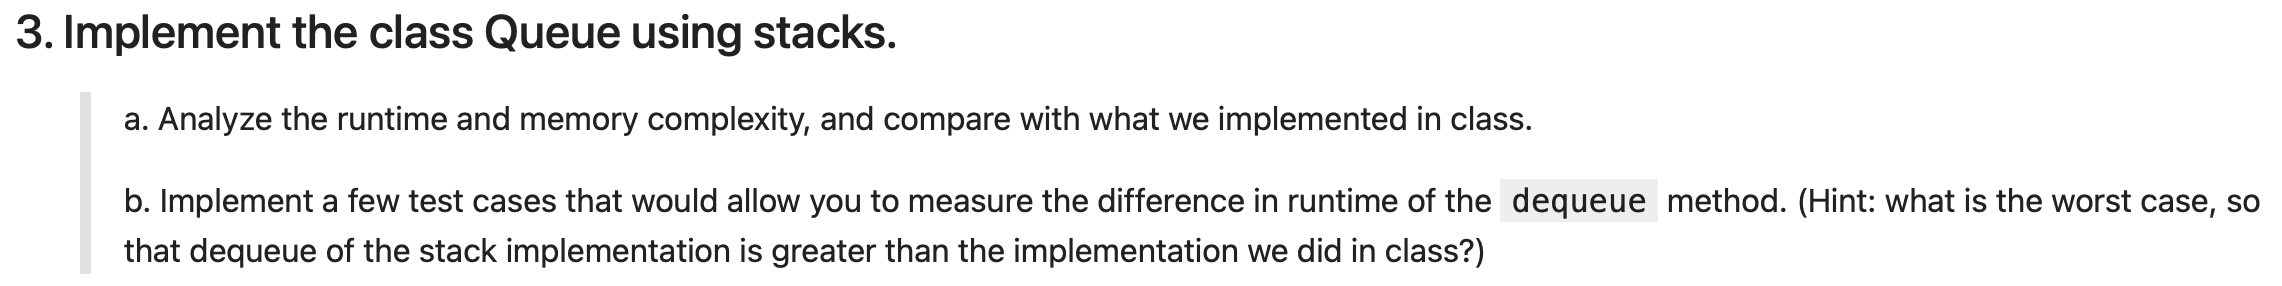

In [11]:
# Code from class

class Stack(object):

    def __init__(self, n):
        self.l = 0
        self.n = n
        self.stack = self._create_stack(self.n)        
    
    def _create_stack(self, n):

        return (n * ctypes.py_object)()

     
    def push(self, item):

        if self.l == self.n:
            raise ValueError("no more capacity")
        self.stack[self.l] = item
        self.l += 1
        

    def pop(self):

        # self.l = 0
        # 0 is equivalent to False
        # any number != 0 is True
        if not self.l:
            raise('stack is empty')
        c = self.stack[self.l-1]
        #self.stack[self.l] = ctypes.py_object
        self.l -= 1
        return c
    
    def top(self):

        return self.stack[self.l-1]
    
    def full(self):

        return self.l == self.n
        # if self.l == self.n:
        #    return True
        # return False

    def empty(self):

        return self.l == 0
        #if self.l == 0:
        #    return True
        #return False

    @temporizador    
    def size(self):

        return self.l

In [12]:
# Code seen en class 

class Queue(object):
    def __init__(self, n):

        self.l = 0
        self.n = n
        self.queue = self._create_queue(self.n)    
    
    def _create_queue(self, n):

        return (n * ctypes.py_object)()
    
    @temporizador
    def enqueue(self, item):

        if self.l == self.n:
            raise ValueError("no more capacity")
        self.queue[self.l] = item
        self.l += 1
        
    @temporizador
    def dequeue(self):

        c = self.queue[0]
        for i in range(1,self.l):
            self.queue[i-1] = self.queue[i]
        self.queue[self.l - 1] = ctypes.py_object
        self.l -= 1
        return c
    
    @temporizador
    def first(self):

        return self.queue[0]
    
    @temporizador
    def full(self):

        if self.l == self.n:
            return True
        return False

    @temporizador
    def empty(self):

        if self.l == 0:
            return True
        return False

    @temporizador    
    def size(self):

        return self.l

    
# **************************************************   
# ******* START OF MODIFIED QUEUE (HOMEWORK) *******
# **************************************************


class Queue_Modified(object):

    def __init__(self, n):
        self.l = 0 # keeps track of the size of the Queue
        self.l_enqueue = 0 # keeps track of the size of the enqueue Stack
        self.l_dequeue = 0 # keeps track of the size of the dequeue Stack
        self.n = n
        self.stack_enqueue = Stack(n) # Creation of the enqueue Stack
        self.stack_dequeue = Stack(n) # Creation of the dequeue Stack
    

    @temporizador
    def enqueue(self, item):

        if self.l == self.n:
            raise ValueError("no more capacity")
         
        # The new item is pushed to the enqueue Stack
        self.stack_enqueue.push(item)
        self.l += 1 # Size of the Queue is increased
        self.l_enqueue += 1 # Size of the enqueue Stack is increased
        
        # Checks if the dequeue Stack is empty
        if self.l_dequeue == 0:
            # If it is empty, then it reverses the enqueue Stack onto the dequeue Stack
            while self.l_enqueue > 0:
                self.stack_dequeue.push(self.stack_enqueue.pop())
                # Update of the sizes of the stacks 
                self.l_dequeue += 1
                self.l_enqueue -= 1
                
           
    @temporizador
    def dequeue(self):
        # If the dequeue Stack is empty, then the element must be 'popped' from the enqueue Stack
        if self.l_dequeue == 0:
            self.l -=1 # Size of the queue is updated
            self.l_enqueue # Size of the enqueue Stack is updated
            return self.stack_enqueue.pop() # The only element on the queue (and on the enqueue Stack) is 'popped'
        
        # If the dequeue Stack is not empty...
        else:
            valor = self.stack_dequeue.pop() # Value that will be returned
            self.l -= 1 # Size of the queue is updated
            self.l_dequeue -= 1 # Size of the dequeue Stack is updated
            
            # Checks if the dequeue Stack is empty, and it reverses the enqueue Stack 
            if self.l_dequeue == 0:
                while self.l_enqueue > 0:
                    self.stack_dequeue.push(self.stack_enqueue.pop())
                    self.l_dequeue += 1
                    self.l_enqueue -= 1
        
        return valor

    @temporizador
    def first(self):
        if self.l == 0:
            raise ValueError("empty queue")
            
        # If the dequeue Stack is NOT empty, it returns its first element
        elif self.l_dequeue:     
            return self.stack_dequeue.top()
        # If the dequeue Stack is empty, it returns the first element of the enqueue Stack
        else:
            return self.stack_enqueue.top()
        
    @temporizador
    def full(self):
        # Checks if the Queue is full
        if self.l == self.n:
            return True
        return False
  

    @temporizador
    def empty(self):
        # Checks if the Queue is empty
        if self.l == 0:
            return True
        return False

    @temporizador    
    def size(self):
        # Returns the number of elements inside the Queue
        return self.l

### Runtime complexity analysis

In [69]:
times_original = []
times_modified = []
element_number = []

k = 1
while k <= 1_000_000:
    element_number.append(k)
    q_original = Queue(k)
    q_modified = Queue_Modified(k)
    for i in range(k):
        q_original.enqueue(i)
        q_modified.enqueue(i) 
    times_original.append(q_original.dequeue()[1])
    times_modified.append(q_modified.dequeue()[1])
    k *= 10

print('Números de elementos en Queue: ', element_number)
print('Tiempos original: ', times_original)
print('Tiempos modified: ', times_modified)

Números de elementos en Queue:  [1, 10, 100, 1000, 10000, 100000, 1000000]
Tiempos original:  [3.0, 7.0, 54.5, 578.0, 5110.75, 57035.5, 636730.25]
Tiempos modified:  [3.0, 32.0, 782.0, 3907.0, 34116.75, 235748.0, 2387704.0]


### Best case:
The best case is the one in which enqueue and dequeue methods are alternated, as the dequeue method will have a complexity of $O(1)$, because only a pop has to be used to get the element of the list.

### Worst case: 
I considered the worst case scenario to be the one in which 1, 10, 100, 1_000, 10_000, 100_000, or 1_000_000 elements are added to the queue, and then the dequeue method is called. This makes the whole enqueue stack to be reversed onto the dequeue stack, which will have a complexity of $O(n)$, as it depends on the number of elements on the enqueue stack that has to be reversed onto the dequeue stack. 

### Note:
It can be seen that the modified queue class appproximately has a  4-6 times bigger runtime complexity than the normal Queue class.

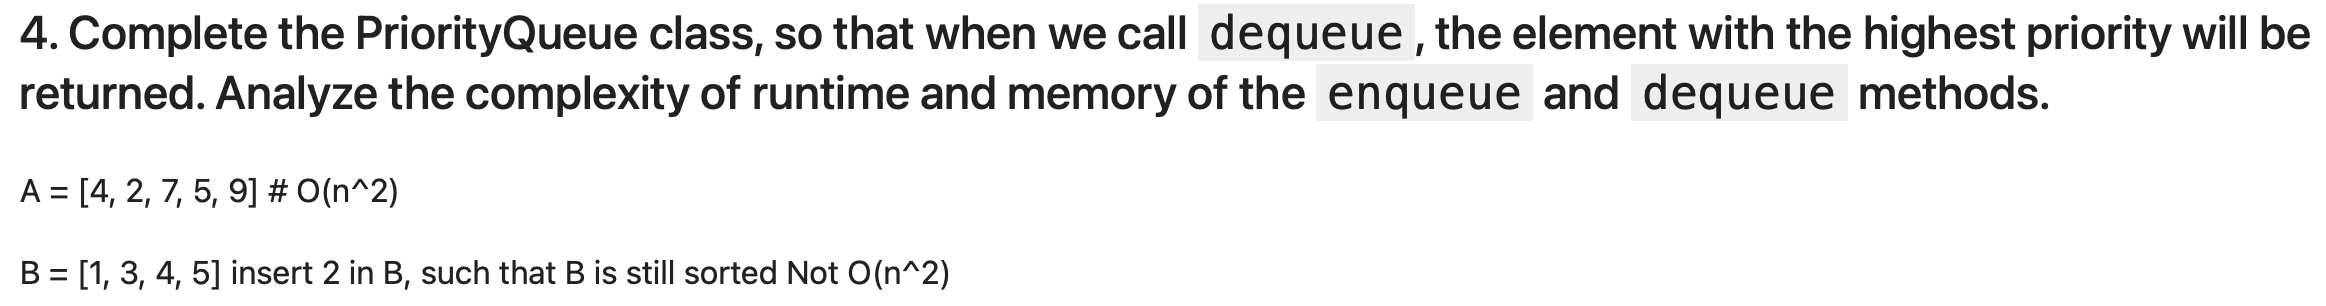

In [62]:
class PriorityQueue(object):
    """
    Implementation of the queue data structure
    """

    def __init__(self, n):
        self.l = 0
        self.n = n
        self.lowest_key = 0 # highest priority
        self.lowest_index = 0
        self.highest_key = 0 # lowest priority
        self.queue = self._create_queue(self.n)        
    
    def _create_queue(self, n):
        """
        Creates a new stack of capacity n
        """
        return (n * ctypes.py_object)()
    
    @temporizador
    def enqueue(self, item):
        """
        Add new item to the queue
        """
        if self.l == self.n:
            raise ValueError("no more capacity")
        self.queue[self.l] = item
        
        # If the enqueued item has the highest priority, its index will be stored to allow dequeue to work more efficiently
        if item[1] < self.lowest_key or self.lowest_key == 0:

            self.lowest_index = self.l
            self.lowest_key = item[1]
        
        if item[1] > self.highest_key:
            self.highest_key = item[1]
            
        self.l += 1
        
    @temporizador
    def dequeue(self):
        # Dequeue is not possible if the queue is empty
        if self.l == 0:
            raise ValueError('Priority Queue is empty')
        # If the queue only has one element, then that is the element thas has to be dequeued
        elif self.l == 1:
            valor = self.queue[0]
            self.queue[0] = None
            return valor
        
        # If the queue has multiple values, then the one with the highest priority must be dequeued
        
        else:
            # Temp keeps the highest priority key 
            #temp = self.queue[self.lowest_index][1]
            valor = self.queue[self.lowest_index]
            #print('Item: ', self.queue[self.lowest_index]) # Debugging
            
            # The data in the position of the lowest index is deleted
            self.queue[self.lowest_index] = None            
                    
            # Re-ordering the queue
            for i in range(self.lowest_index, self.l - 1):
                self.queue[i] = self.queue[i + 1]
                
            
            self.lowest_index = 0   # The new lowest priority becomes the first element of the queue (temporarily)
            self.l -= 1     # The size of the queue is updated
            temp = 0    # Variable that allows us to look for the new lowest index (highest priority index) in the queue
            
            # Process for finding the new highest priority index of the queue
            for i in range(0, self.l):
                if self.queue[i][1] < temp or temp == 0:
                    temp = self.queue[i][1]
                    self.lowest_index = i
            
            return valor # Function returns the item that is being dequeued

        

tiempo_enqueue = []     # List that will store the time for enqueue()
tiempo_dequeue = []     # List that will store the time for dequeue()
 
k = 1

# Process will be repeated 6 times, until k == 1_000_000
while k <= 1_000_000:
    q = PriorityQueue(k)
    for i in range(k):
        tiempo = q.enqueue((i, k - i))[1]
        if i == k-1:
            tiempo_enqueue.append(tiempo)
    tiempo_dequeue.append(q.dequeue()[1])
    k *= 10

print('Enqueue: ', tiempo_enqueue, end = '\n')
print('Dequeue: ', tiempo_dequeue, end = '\n')

Enqueue:  [15.25, 2.25, 2.0, 1.25, 1.0, 1.25, 1.25]
Dequeue:  [9.0, 9.75, 61.0, 431.25, 3338.0, 30247.25, 272089.0]


Enqueue runtime complexity


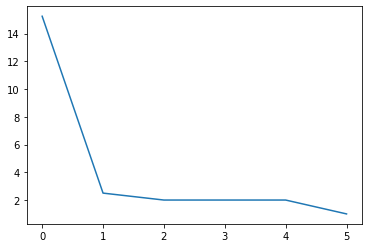

In [59]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
import math

# Empty dataframe is creatd
x = pd.DataFrame()

# Columns are created for the enqueue and dequeue methods
x = tiempo_enqueue
print('Enqueue() runtime complexity')
plt.plot(x)
#x['dequeue'] = np.array(tiempo_dequeue)

# Se grafican los valores

Dequeue() runtime complexity


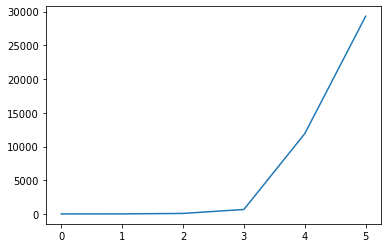

In [60]:
y = tiempo_dequeue
print('Dequeue() runtime complexity')
plt.plot(y)

### Runtime complexity: 

It can be seen that the dequeue method has an exponential runtime complexity, as its execution time grows faster than the input. As it can be seen below, Desmos confirms this belief, making us realize that the complexity is more or less $O(2^{n})$

On the other hand, the enqueue method stabilizes at around runtime '1.25'. making us believe that the function could be logarithmic - $O(log(n)$
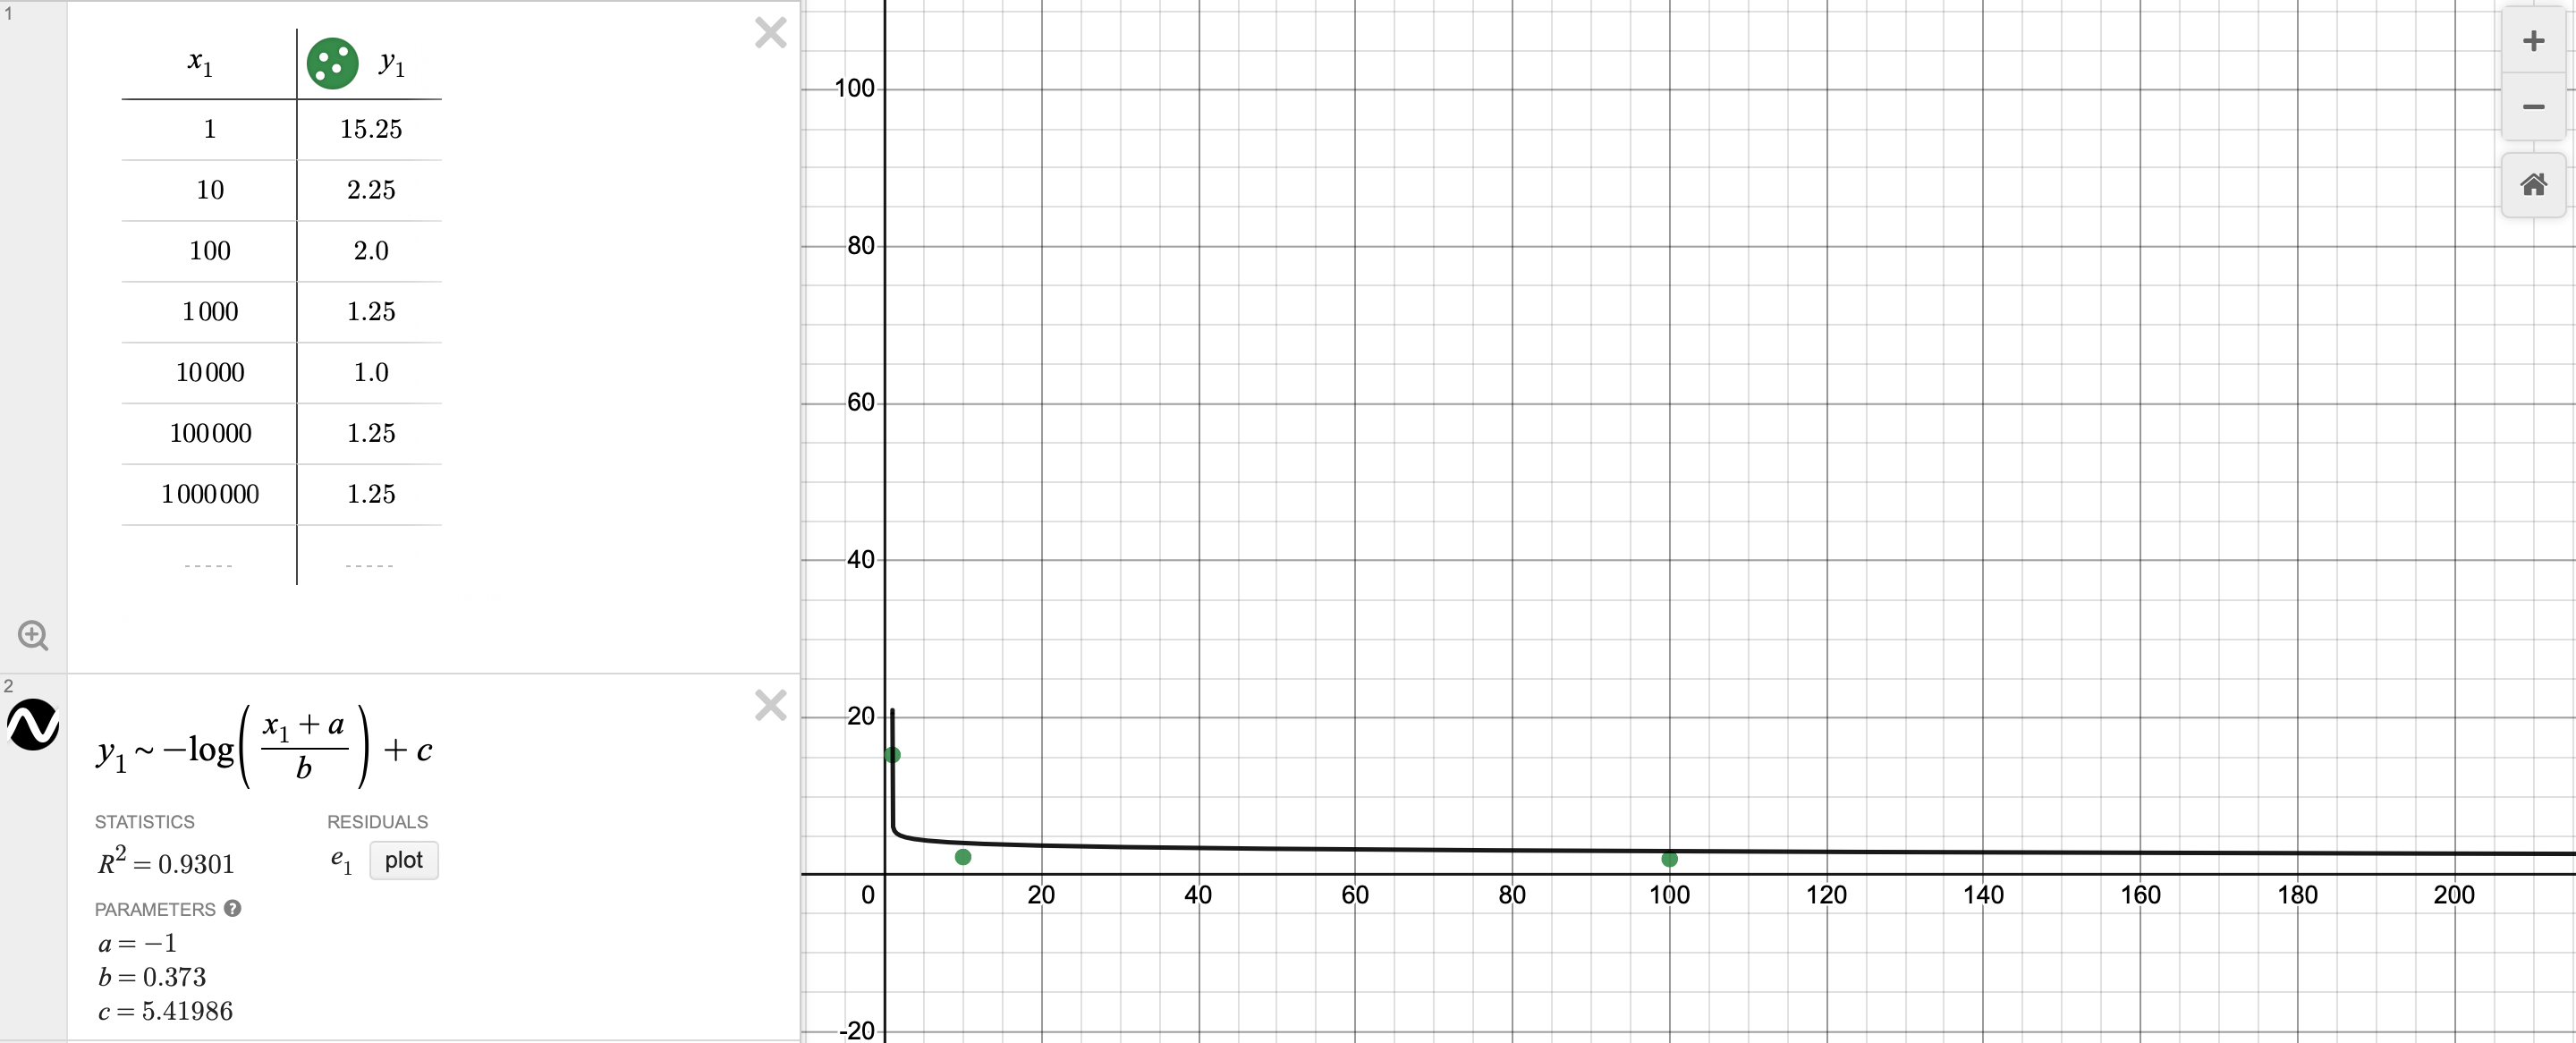

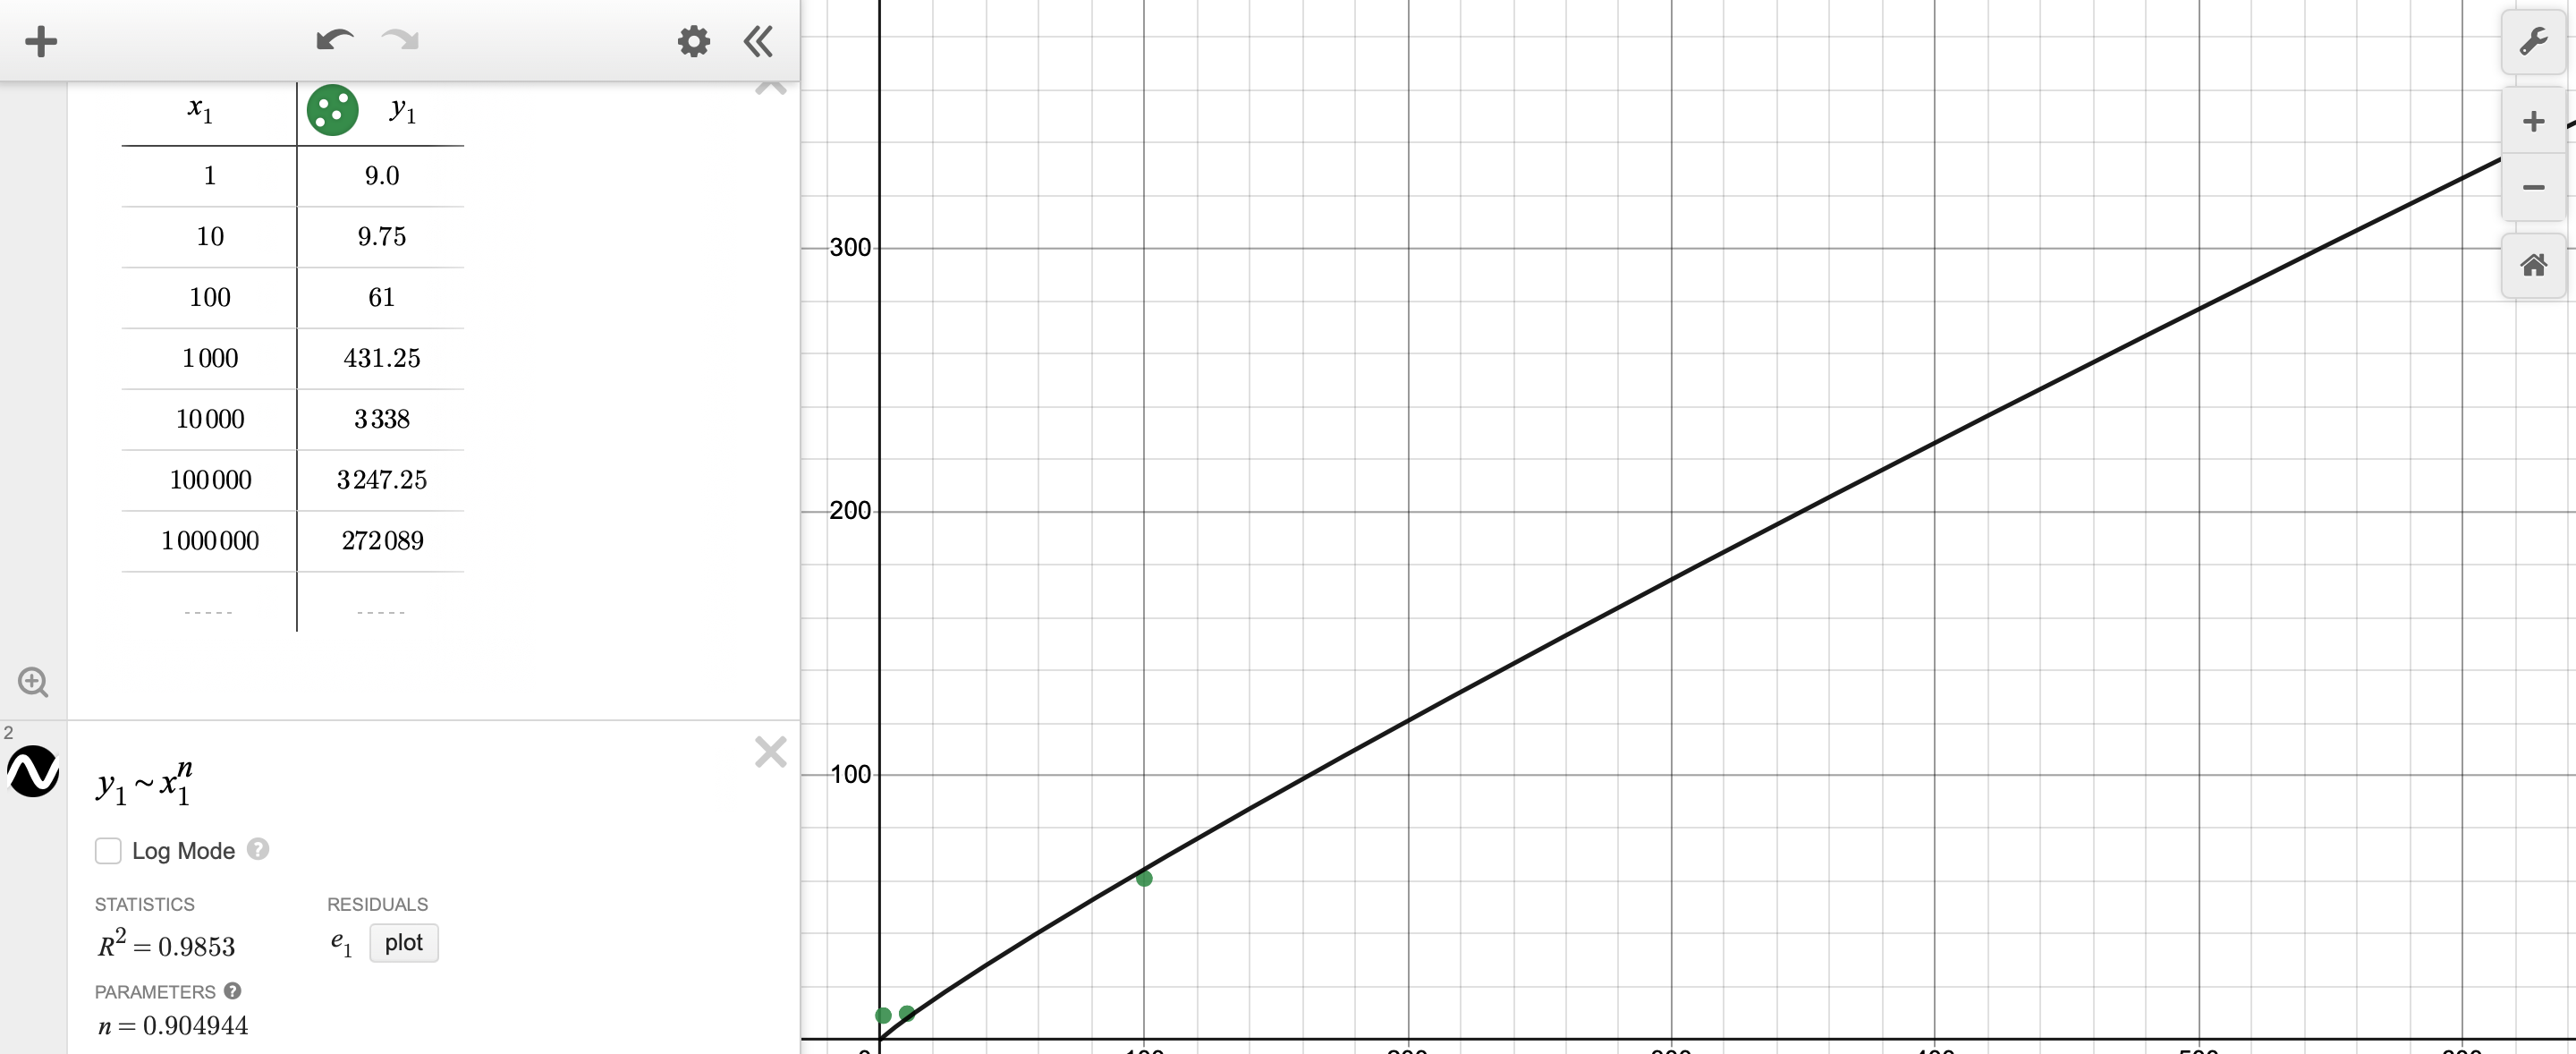

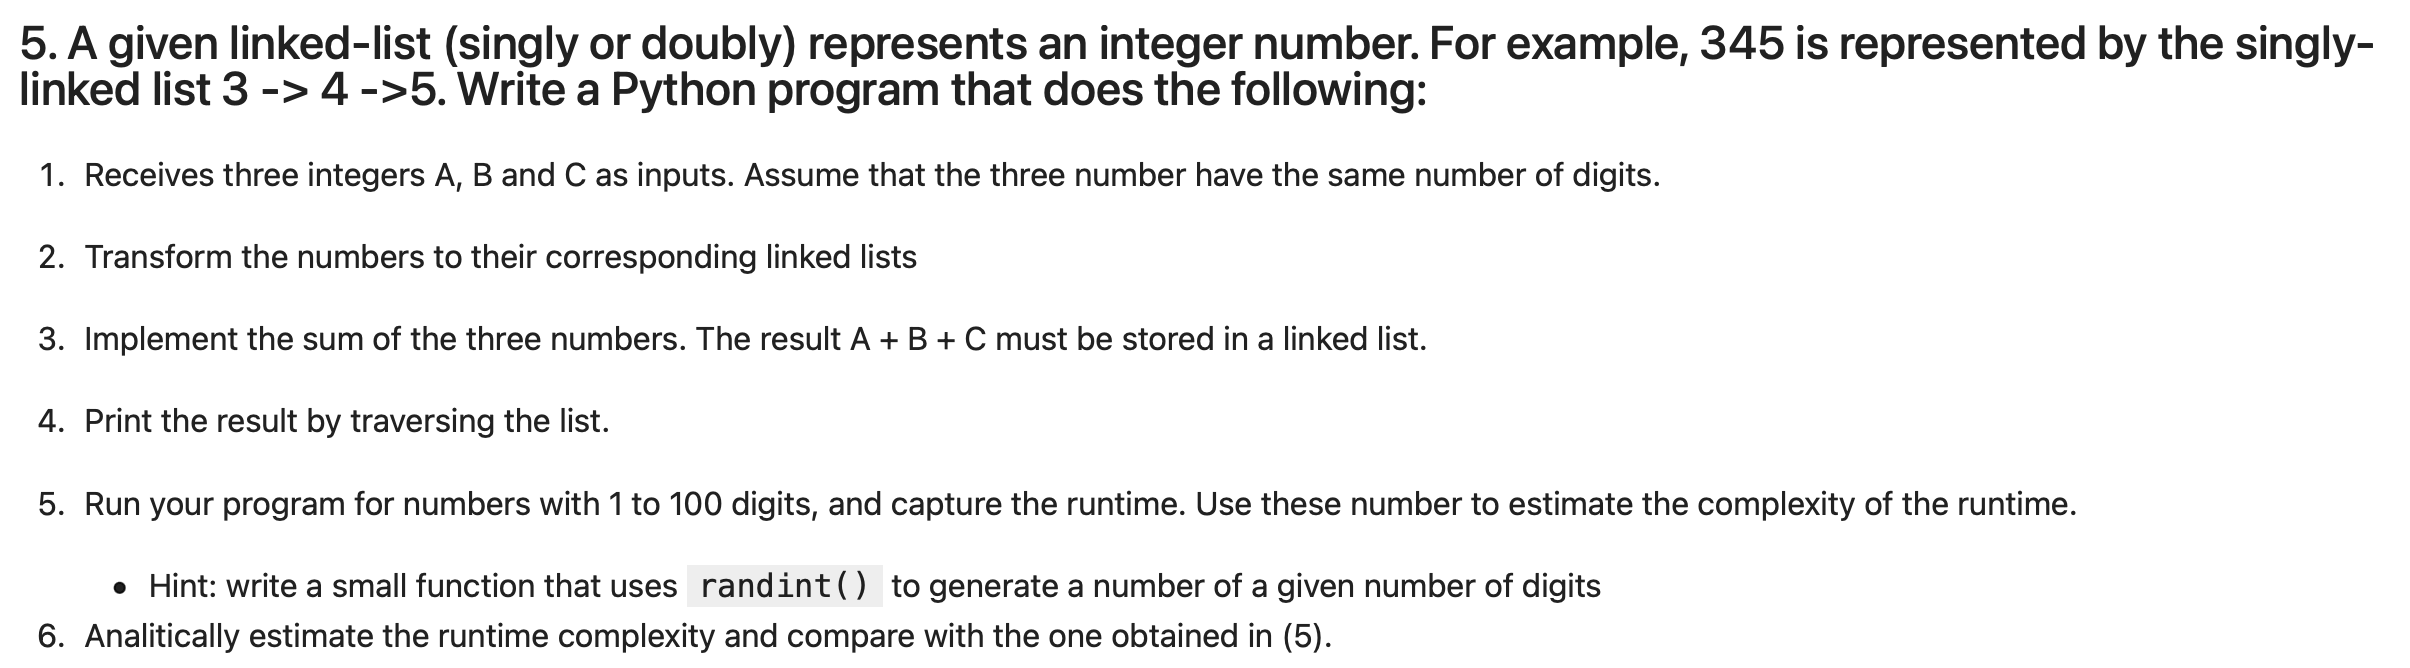

In [22]:
import random

class Node:
    """
    Modified node class to work better for the exercise
    """
    def __init__(self, val=None, next=None):
        self.val = val
        self.next_node = next  # Constructor can now recieve extra argument (next node)
        
class Singly_linked_list:
    """
    Same code as before with changee in the 'list_traversed()' method for a better data visualization 
    """
    
    def __init__(self, head_node = None):
        self.head_node = head_node
        
    def list_traversed(self):
        node = self.head_node
        print(node.val, end = '')
        while node:
            if node != self.head_node:
                print(' -> {}'.format(node.val), end = '')
            node = node.next_node
            
        print('\n')
              
                
    def reverse_list(self):
        prev = None
        node = self.head_node
        next_node = None

        while node:
            next_node = node.next_node
            node.next_node = prev
            prev = node
            node = next_node
            
        self.head_node = prev

def int_to_node(num):
    """
    Function that transforms int to linked list with any number of digits 
    """
    
    num_str = str(num) # Number is transformed to string in order to know its length
    
    head_node = Node(int(num_str[0])) # First digit becomes the head node
    node = head_node # Variables for the iteration process
    prev = None
    
    for i in range(len(str(num)) - 1): # For loop repeats itself as many times as digits in the number
        # Process for making each individual number a node and adding it to the linked list
        node_temp = Node(int(num_str[i + 1]))
        node.next_node = node_temp
        node.prev_node = prev
        prev = node
        node = node.next_node
    
    list_num = Singly_linked_list(head_node) # Creation of the linked list 
    return list_num



@temporizador
def linked_list_sum(lista1, lista2, lista3):
    """
    Function that sums 3 linked lists
    """
    head_node = None # Variable is necessary for arranging the result in the correct way
    prev = None
    arrastre = 0 # Variable that counts when there is a individual sum greater than 10 and has to carry an extra number to the next sum
    
    # Variables that creates copies of the original linked lists
    temp1 = lista1 
    temp2 = lista2
    temp3 = lista3
    
    # Reverse process is made in order to make the carrying part easier 
    temp1.reverse_list()
    temp2.reverse_list()
    temp3.reverse_list()

    # The process starts with the head node of each list (the last digit of the number)
    node1 = temp1.head_node
    node2 = temp2.head_node
    node3 = temp3.head_node
    
    # While loop that repeats itself as many times as digits in the numbers
    while node1 and node2 and node3:
        suma = 0 # Variable that stores the sum result
        
        suma += node1.val
        suma += node2.val
        suma += node3.val
        
        suma += arrastre # Part in which the carried number is added to the total sum
        
        arrastre = suma // 10 # The new carrying variables stores any new number if the sum variable is > 10
        suma = suma % 10 # Sum only stays with one digit, as the second potential one is already stores in the carrying variable
        
        node = Node(suma) # The node is created with each digit of the sum
        
        if head_node == None: # Here is where the 'head_node' variable is useful, as it allows to make only the first digit the head of the list
            prev = node
            head_node = node
            
        else: # The subsequent digits are linked to the previous ones 
            prev.next_node = node
            prev = node
        
        # The variables are written with the next node in order to continue the process
        node1 = node1.next_node
        node2 = node2.next_node
        node3 = node3.next_node
        
    if arrastre: # If the carrying variable stays with a number, then this should be added to the list
            prev.next_node = Node(arrastre, prev.next_node)
            
    lista_resultado = Singly_linked_list(head_node) # Finally, the list is created (is in reverse order)
    lista_resultado.reverse_list() # The list is reversed, giving us the correct answer 
            
    return lista_resultado
            
def rand_int(digitos):
    num_rand = random.randint(10**(digitos-1), 10**digitos - 1)
    return num_rand

In [50]:
tiempos = []

print('Example for 2 and 3 digits:\n')

for i in range(100):
    digitos = i + 1
    
    num1 =  rand_int(digitos) #input('Ingrese primer número: ')
    num2 =  rand_int(digitos) #input('Ingrese segundo número: ')
    num3 =  rand_int(digitos) #input('Ingrese tercer número: ')

    lista1 = int_to_node(num1)
    lista2 = int_to_node(num2)
    lista3 = int_to_node(num3)

    if digitos == 2 or digitos == 3:
        print('***\nDigits: ', digitos)
        print('num1: {}\t\tnum2: {}\t\tnum3: {}'.format(num1, num2, num3))
        print('Result: ', num1 + num2 + num3)
        print('Linked list: ', end = '')
        linked_list_sum(lista1, lista2, lista3)[0].list_traversed()

    tiempos.append(linked_list_sum(lista1, lista2, lista3)[1])

Example for 2 and 3 digits:

***
Digits:  2
num1: 82		num2: 44		num3: 62
Result:  188
Linked list: 1 -> 8 -> 8

***
Digits:  3
num1: 858		num2: 133		num3: 859
Result:  1850
Linked list: 1 -> 8 -> 5 -> 0



Tiempos obtenidos por suma de 1-100 dígitos:

[12.0, 15.0, 41.25, 22.0, 22.75, 24.0, 30.75, 33.0, 70.25, 38.0, 45.0, 49.0, 53.25, 56.75, 53.0, 56.0, 61.0, 65.25, 66.25, 70.0, 79.75, 83.75, 68.0, 44.75, 45.75, 47.25, 48.75, 50.0, 52.0, 55.0, 57.0, 58.0, 64.25, 62.0, 64.25, 65.0, 65.0, 67.0, 70.0, 72.25, 73.0, 76.75, 77.25, 75.5, 76.0, 78.0, 79.0, 81.0, 82.75, 85.0, 149.0, 156.0, 95.0, 96.25, 94.0, 108.0, 91.0, 94.5, 93.75, 96.0, 98.25, 99.25, 115.5, 103.25, 104.0, 106.0, 107.25, 109.25, 110.0, 111.75, 113.25, 115.0, 117.0, 204.0, 122.75, 121.25, 122.75, 124.25, 125.75, 126.75, 130.0, 131.0, 132.25, 135.25, 135.0, 138.0, 139.0, 141.0, 136.0, 446.75, 142.25, 141.0, 143.0, 145.0, 146.25, 147.75, 149.0, 152.0, 158.0, 154.0]


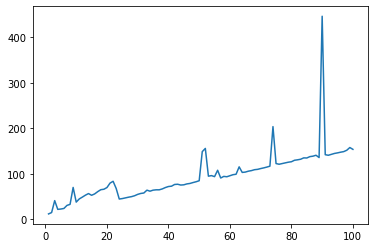

In [52]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
import math

print('Tiempos obtenidos por suma de 1-100 dígitos:\n')
print(tiempos)

# Se crea nuevo data frame (df) vacío
x = pd.DataFrame()

# Se crea nueva columna del df que tenga el número de dígitos utilizado
x['digitos'] = np.arange(1, 101, 1)
x['tiempos'] = np.array(tiempos)

# Se grafican los valores
plt.plot(x['digitos'], x['tiempos'])

## 5 
In my computer, it. an be seen that runtime complexity is aproximately linear, with some spikes that can be result of other background activity.

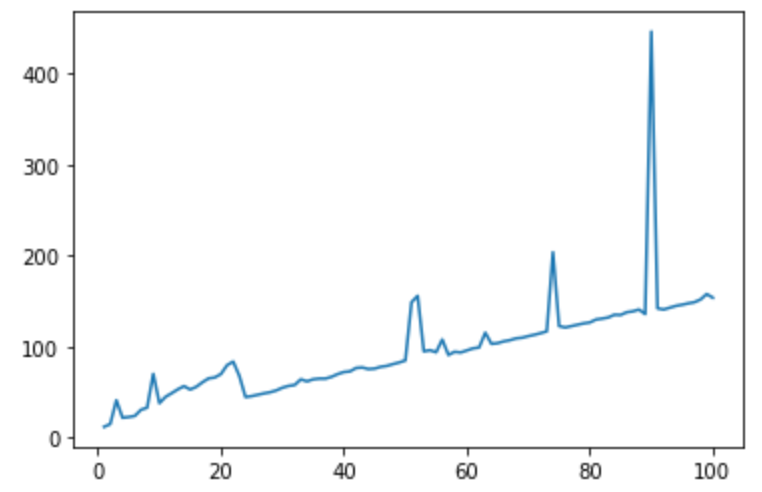

So this would mean that the complexity is $O(n)$, as it increases with the number of digits

## 6:

After analitical analysis of the complexity of funcion linked_list_sum(), it can be determined that the runtime complexity is $O(n)$. The only iteration that is made is in the 'while' loop, which repeats the same number of times as digits in the numbers. Also, the reverse_list() function is used, which also has a $O(n)$ complexity, and this is added to the complexity of the while loop.

This means that the graph and the analitical analysis gives the same runtime complexity: $O(n)$

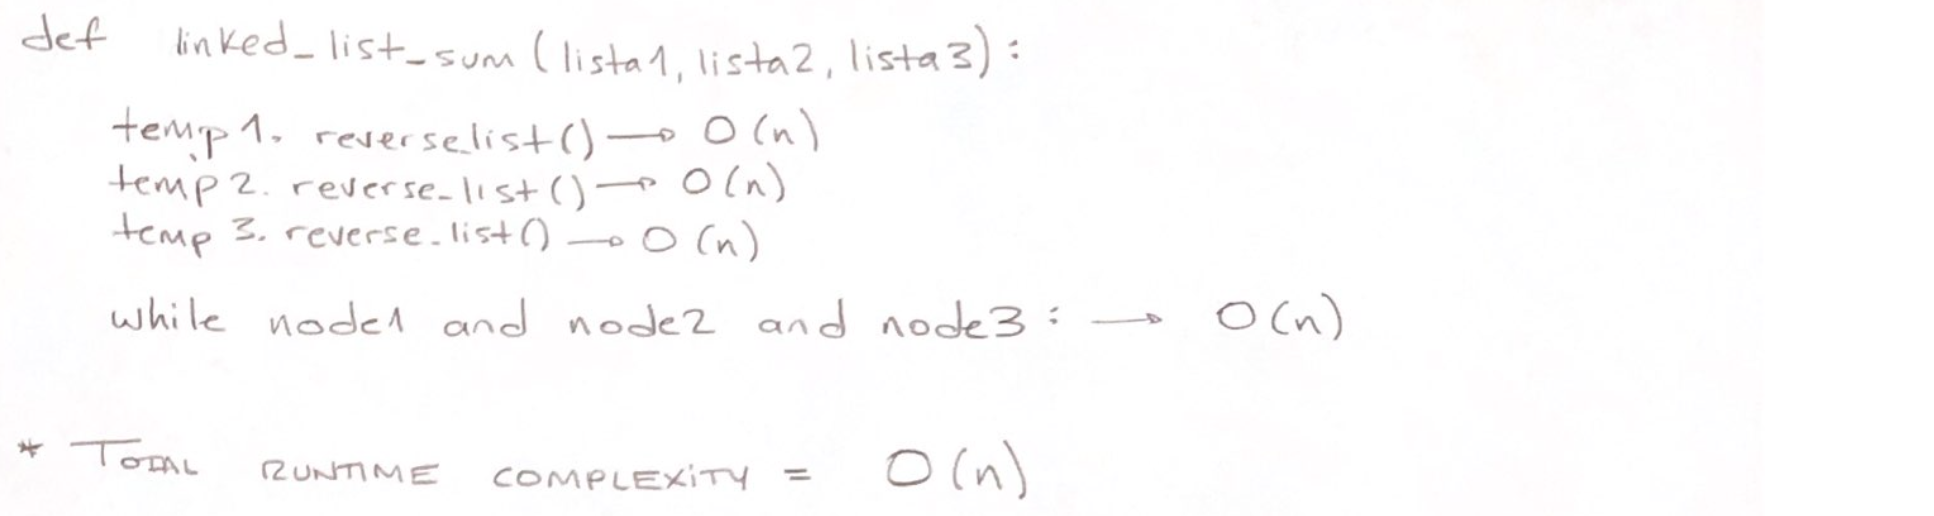